In [1]:
import geopandas as gpd
import pandas as pd
import maup

In [2]:
vtd = gpd.read_file("/home/max/git/census-process/final/mo/mo_vtd.shp")

In [32]:
# set(vtd["GEOID20"])

## 2016 MO Vote Transfer

In [4]:
elections_2016 = pd.read_excel("data/2016 Block Assign with Election Results.xlsx")

In [5]:
# looks like this is just county-level results
elections_2016_rdo = pd.read_excel("data/2016 RDO Modified Precinct Data 10-26-21.xlsx")  

In [6]:
set(vtd["GEOID20"]) - set(elections_2016["2020 Tiger VTD"])

set()

In [7]:
elections_2016_agg = {}
year_specific_cols = []
for col in elections_2016.columns:
    if col == "2020 Tiger VTD":
        continue
    if col in ["BLOCKID", "STATEFP", "COUNTYFP", "DISTRICT", "2016 Statewide VTD", "Linkage Identifier"]:
        elections_2016_agg[col] = "first"
    else:
        year_specific_cols.append(col)
        elections_2016_agg[col] = "sum"

In [8]:
vtd_elections_2016 = elections_2016.groupby("2020 Tiger VTD").agg(elections_2016_agg).reset_index()
vtd_elections_2016 = vtd_elections_2016.rename(
    {k: k+"16" for k in year_specific_cols}, 
    axis=1
)

In [9]:
vtd_elections_2016["USPresVpD16"].sum()

1009872.0

In [10]:
vtd = vtd.merge(vtd_elections_2016, left_on="GEOID20", right_on="2020 Tiger VTD")

## 2018-2020 MO Vote Transfer

In [11]:
elections_18_20 = pd.read_excel("data/2018 - 2020 Block Assign with Election Results.xlsx")

In [12]:
elections_20_agg = {}
for col in elections_18_20.columns:
    if col == "Tiger GeoID":
        continue
    if col.rstrip() in ["BLOCKID", "STATEFP", "COUNTYFP", "DISTRICT", "2018 Linkage Identifier", "2020 GEOID Block Assign", "2020 Linkage Identifier"]:
        elections_20_agg[col] = "first"
    else:
        elections_20_agg[col] = "sum"

In [13]:
set(vtd["GEOID20"]) - set(elections_18_20["Tiger GeoID"])

set()

In [14]:
vtd_elections_18_20 = elections_18_20.groupby("Tiger GeoID").agg(elections_20_agg)
vtd_elections_18_20 = vtd_elections_18_20.rename({"VotingPop 18+": "2020 VotingPop 18+"}, axis=1)

In [15]:
vtd_elections_18_20["USPresVp20_D"].sum()  # absentee, probs

977728.0

In [16]:
vtd_elections_18_20["US_Sen_D_18"].sum()  # much better

1058284.0

In [17]:
vtd = vtd.merge(vtd_elections_18_20, left_on="GEOID20", right_on="Tiger GeoID")

## Some QA

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
vtd_qa = vtd.copy()

In [20]:
vtd_qa.sum()

GEOID20         2900300002029003000017290030000212900300001229...
MTFCC20         G5240G5240G5240G5240G5240G5240G5240G5240G5240G...
NHPIPOP20                                                    9293
HVAP20                                                     197173
GEOCODE         2900300002029003000017290030000212900300001229...
                                      ...                        
StTres20_R                                              1424592.0
USPresVp20_D                                             977728.0
USPresVp20_R                                            1413385.0
USRep20_D                                                923725.0
USRep20_R                                               1406867.0
Length: 108, dtype: object

In [21]:
relevant_cols = [col for col in vtd_qa if col.startswith("US") or col.startswith("St") or "Gov" in col]

GovD16


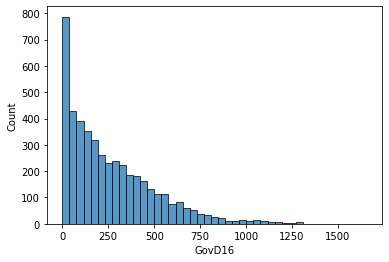

GovR16


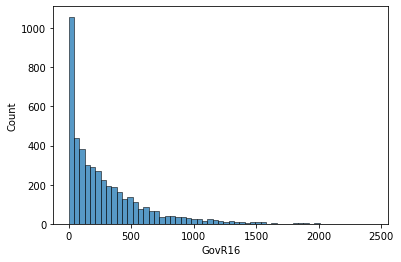

LtGovD16


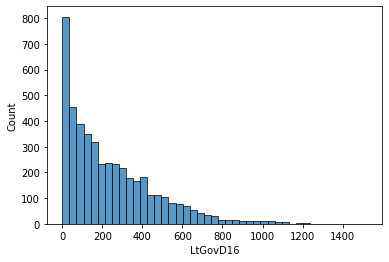

LtGovR16


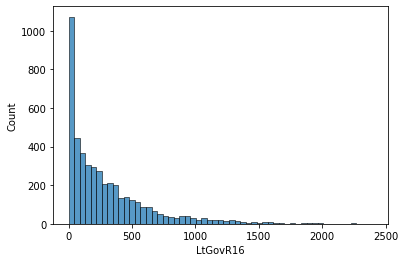

StRepD16


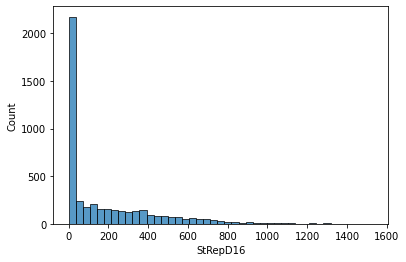

StRepR16


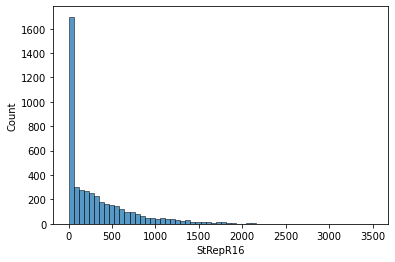

StSenD16


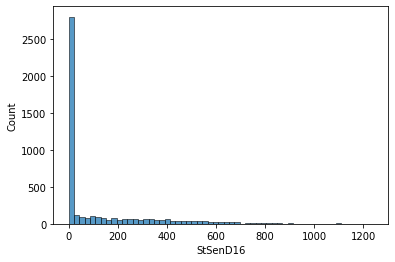

StSenR16


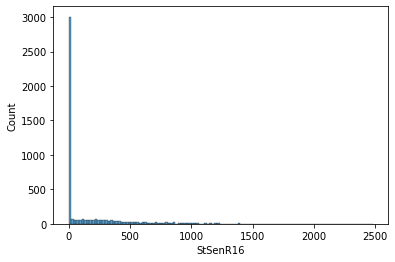

StTresD16


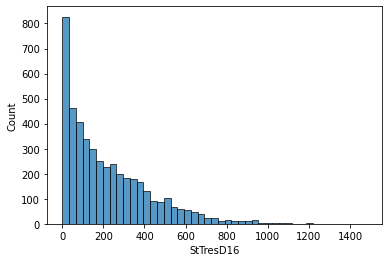

StTresR16


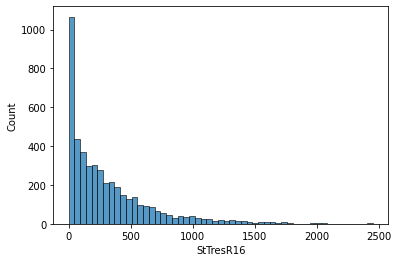

USPresVpD16


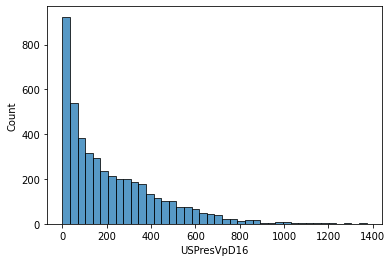

USPresVpR16


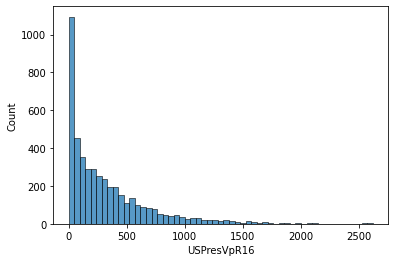

USRepD16


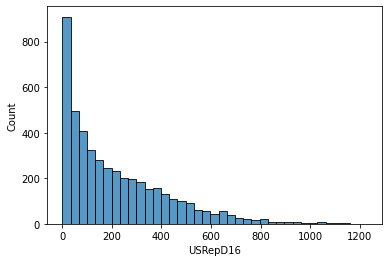

USRepR16


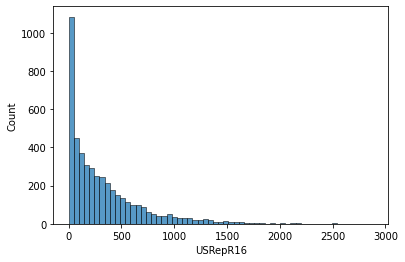

USSenD16


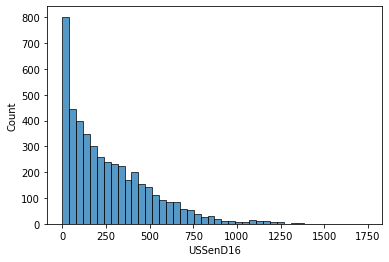

USSenR16


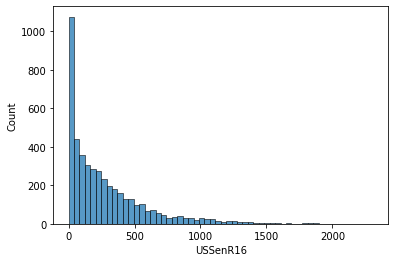

State


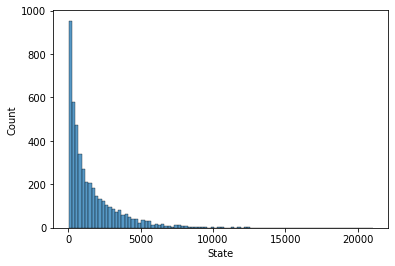

StAudit_D_18


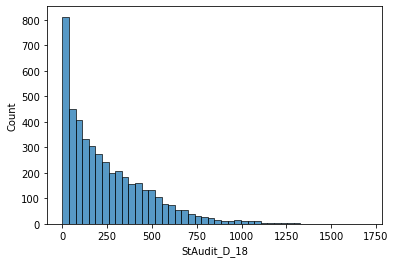

StAudit_R_18


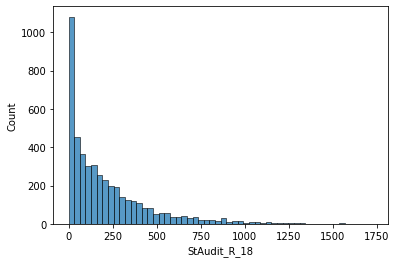

StRep_D_18


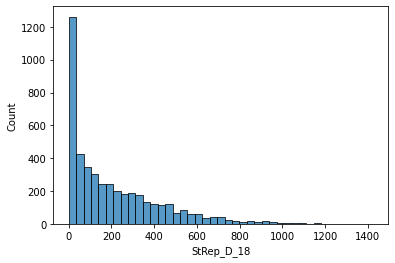

StRep_R_18


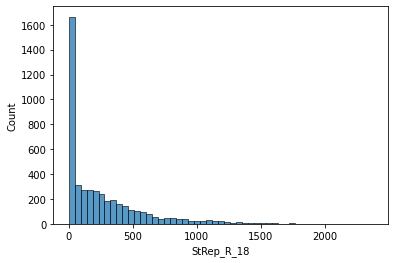

StSen_D_18


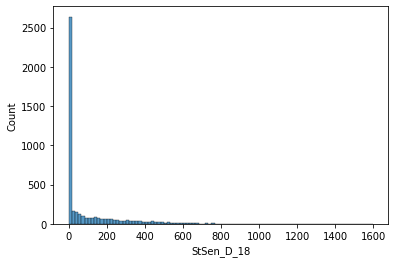

StSen_R_18


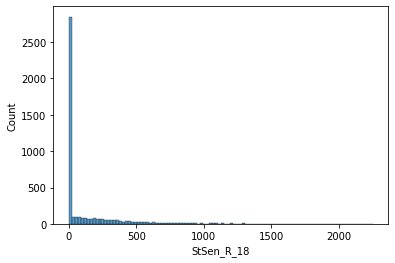

US_Sen_D_18


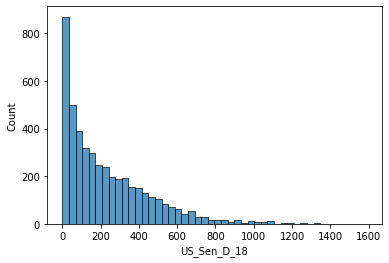

US_Sen_R_18


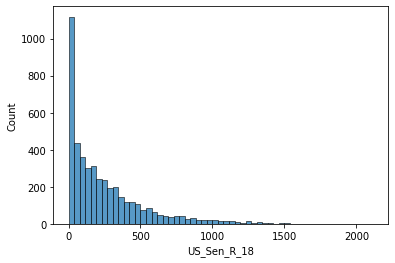

US_Rep_D_18


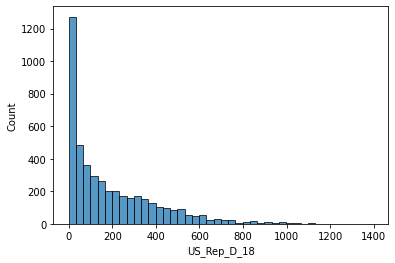

US_Rep_R_18


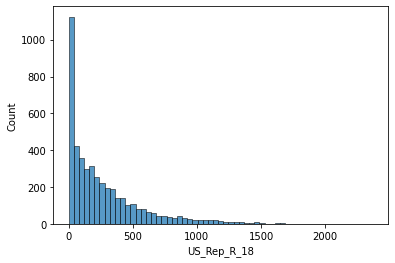

Gov20_D


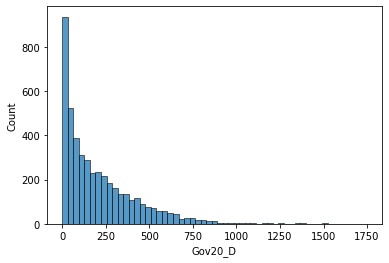

Gov20_R


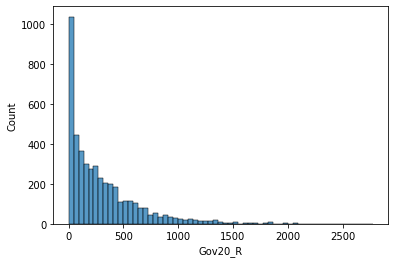

LtGov20_D


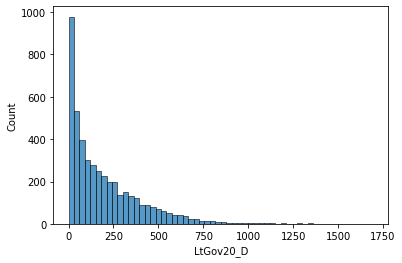

LtGov20_R


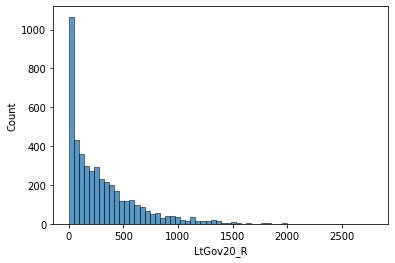

StRep20_D


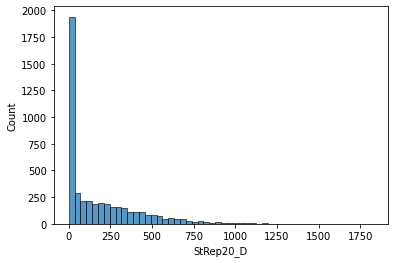

StRep20_R


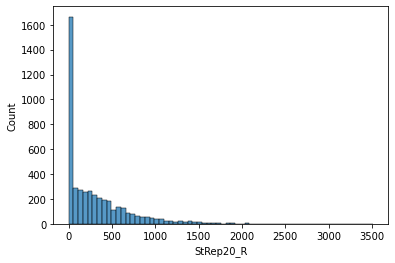

StSen20_D


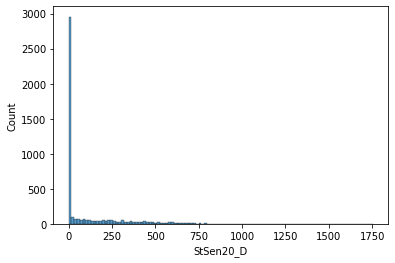

StSen20_R


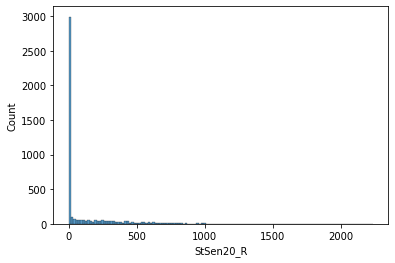

StTres20_D


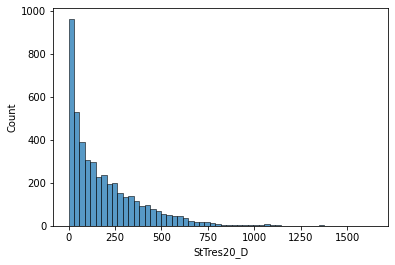

StTres20_R


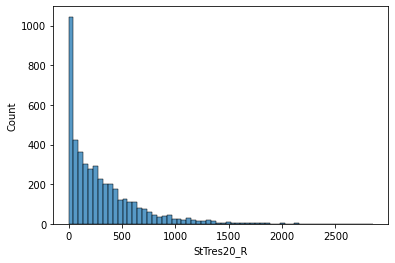

USPresVp20_D


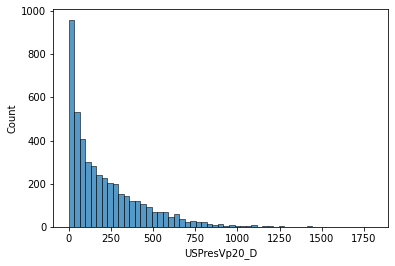

USPresVp20_R


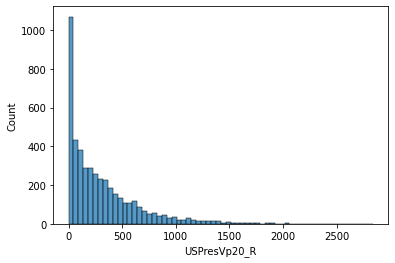

USRep20_D


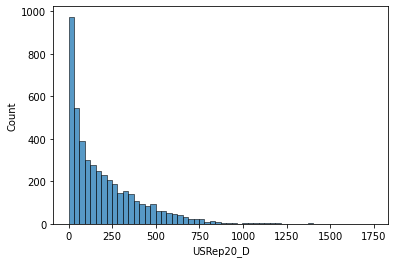

USRep20_R


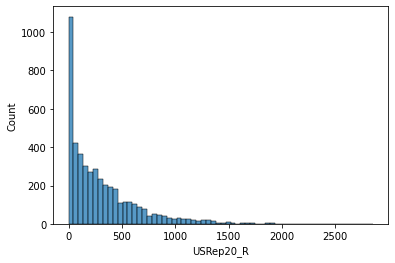

In [22]:
for col in relevant_cols:
    print(col)
    sns.histplot(vtd_qa[col])
    plt.show()

GovD16


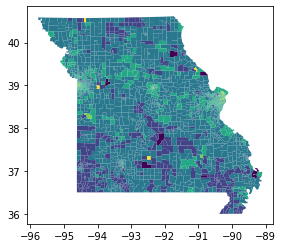

GovR16


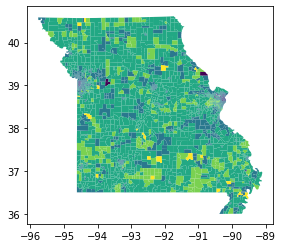

LtGovD16


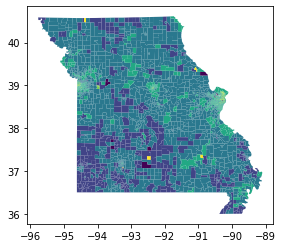

LtGovR16


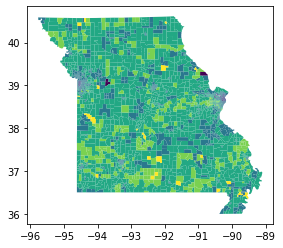

StRepD16


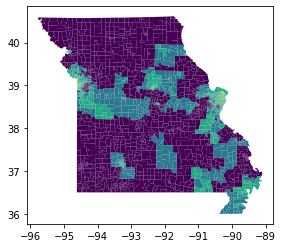

StRepR16


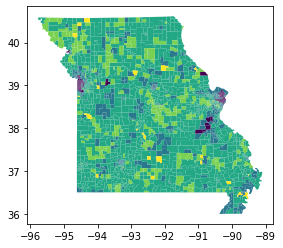

StSenD16


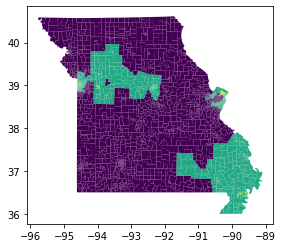

StSenR16


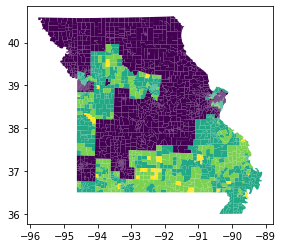

StTresD16


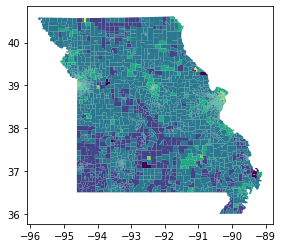

StTresR16


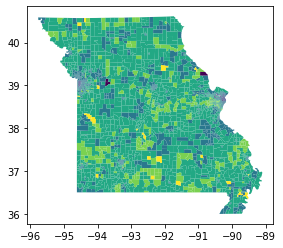

USPresVpD16


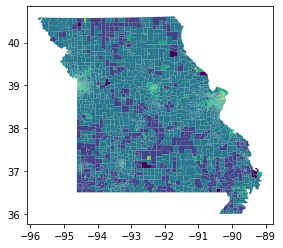

USPresVpR16


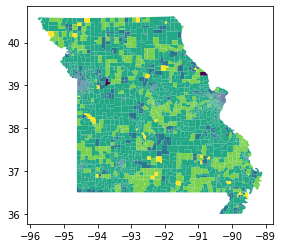

USRepD16


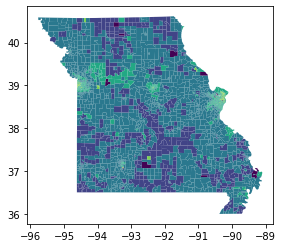

USRepR16


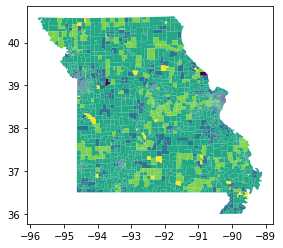

USSenD16


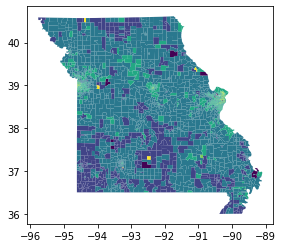

USSenR16


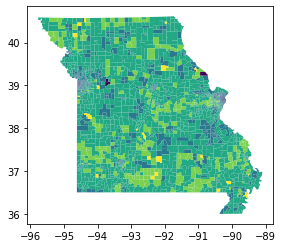

State


/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/mapclassify/classifiers.py:856: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/mapclassify/classifiers.py:887: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


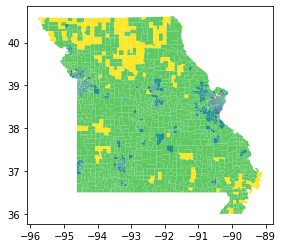

StAudit_D_18


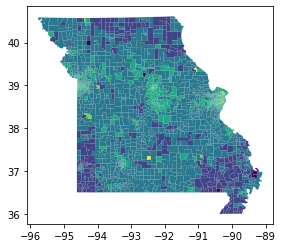

StAudit_R_18


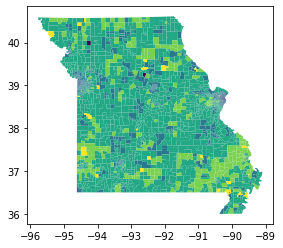

StRep_D_18


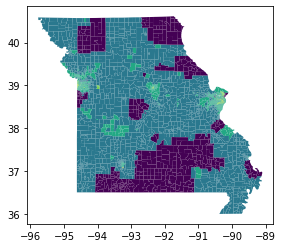

StRep_R_18


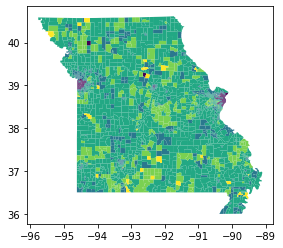

StSen_D_18


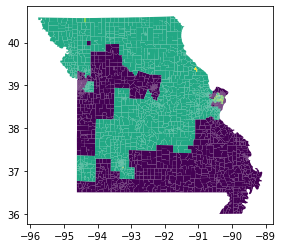

StSen_R_18


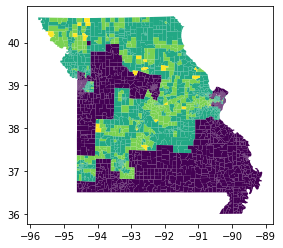

US_Sen_D_18


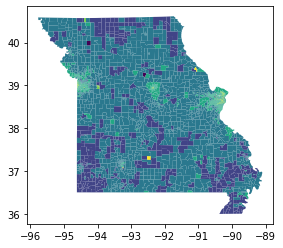

US_Sen_R_18


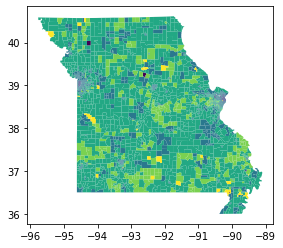

US_Rep_D_18


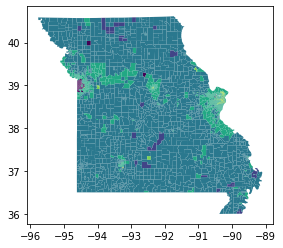

US_Rep_R_18


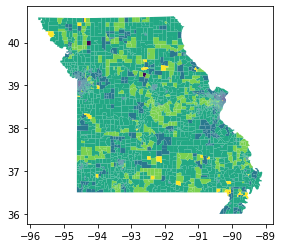

Gov20_D


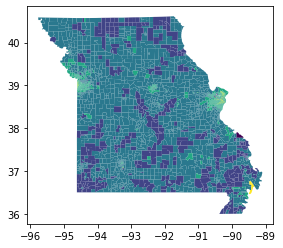

Gov20_R


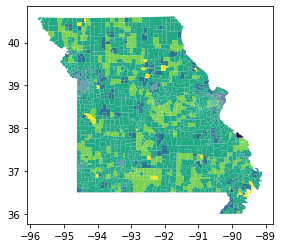

LtGov20_D


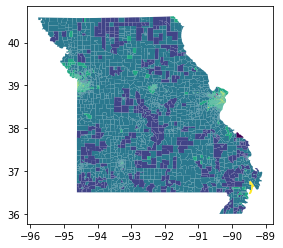

LtGov20_R


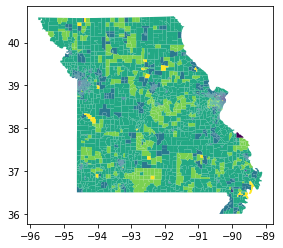

StRep20_D


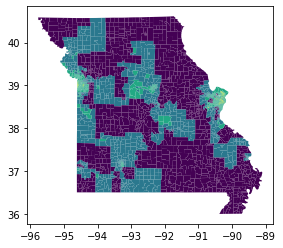

StRep20_R


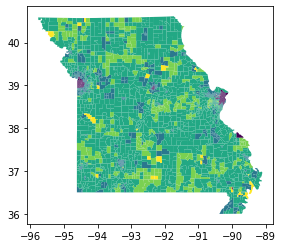

StSen20_D


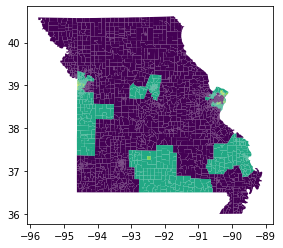

StSen20_R


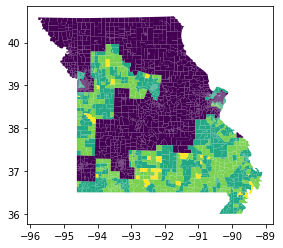

StTres20_D


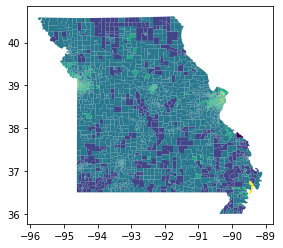

StTres20_R


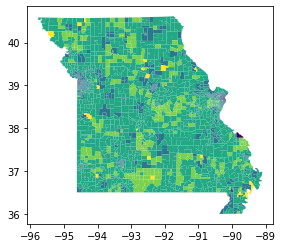

USPresVp20_D


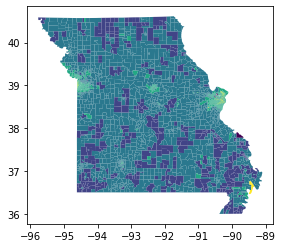

USPresVp20_R


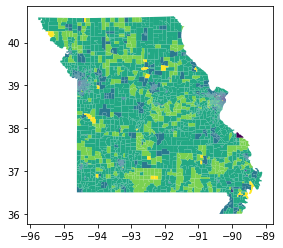

USRep20_D


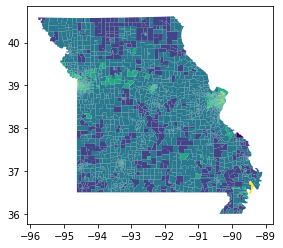

USRep20_R


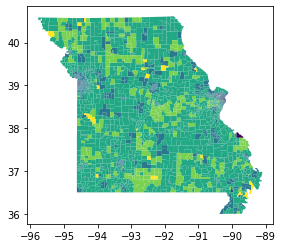

In [23]:
for col in relevant_cols:
    print(col)
    vtd_qa["prop"] = (vtd_qa[col] / vtd_qa["TOTPOP20"])*100
    vtd_qa.plot("prop", scheme = "Percentiles")
    plt.show()
#     plt.cla()

/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOTPOP20'>

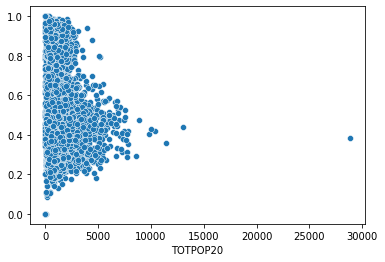

In [24]:
sns.scatterplot(vtd_qa["TOTPOP20"], vtd_qa["USSenD16"] / (vtd_qa["USSenD16"] + vtd_qa["USSenR16"]))

/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='US_Sen_R_18'>

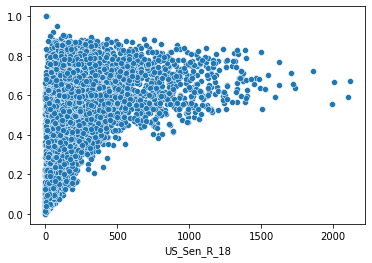

In [25]:
sns.scatterplot(vtd_qa["US_Sen_R_18"], vtd_qa["US_Sen_R_18"] / (vtd_qa["US_Sen_R_18"] + vtd_qa["US_Sen_D_18"]))

/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pop20'>

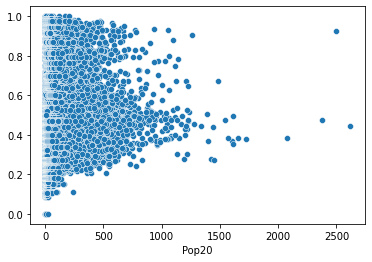

In [26]:
sns.scatterplot(elections_2016["Pop20"], elections_2016["USSenD"] / (elections_2016["USSenD"] + elections_2016["USSenR"]))

In [27]:
vtd[relevant_cols].sum()

GovD16          1203449.0
GovR16          1331465.0
LtGovD16        1102166.0
LtGovR16        1354537.0
StRepD16         818809.0
StRepR16        1490181.0
StSenD16         565608.0
StSenR16         656032.0
StTresD16       1016771.0
StTresR16       1436515.0
USPresVpD16     1009872.0
USPresVpR16     1480595.0
USRepD16         983460.0
USRepR16        1485839.0
USSenD16        1228412.0
USSenR16        1276938.0
State           7355328.0
StAudit_D_18    1151155.0
StAudit_R_18     996954.0
StRep_D_18       953971.0
StRep_R_18      1193899.0
StSen_D_18       470439.0
StSen_R_18       662735.0
US_Sen_D_18     1058284.0
US_Sen_R_18     1172161.0
US_Rep_D_18      888391.0
US_Rep_R_18     1243693.0
Gov20_D          963827.0
Gov20_R         1405645.0
LtGov20_D        902209.0
LtGov20_R       1415571.0
StRep20_D        834365.0
StRep20_R       1391125.0
StSen20_D        493641.0
StSen20_R        591285.0
StTres20_D       879622.0
StTres20_R      1424592.0
USPresVp20_D     977728.0
USPresVp20_R

In [28]:
elections_2016.sum()

BLOCKID                                           82979402104747102
STATEFP                                                     7355328
COUNTYFP                                                   31549399
DISTRICT          0000110000110000110000110000110000110000110000...
2020 Tiger VTD    2900100001129001000011290010000112900100001129...
Pop20                                                       6154913
Voting Age Pop                                              4775612
VTD Pop                                                 509170653.0
2016 PAF                                                     3028.0
Agen_D                                               1074805.753623
Agen_R                                                    1495226.0
GovD                                                      1203449.0
GovR                                                      1331465.0
LtGovD                                                    1102166.0
LtGovR                                          

## Export

In [33]:
# list(vtd.columns)

In [30]:
del vtd["BLOCKID_x"]
del vtd["BLOCKID_y"]

In [31]:
vtd.to_file("products/mo_vtd.shp")

/tmp/ipykernel_157131/2834508887.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  vtd.to_file("products/mo_vtd.shp")
